In [39]:
import pandas as pd
from engine.models.movie import Movie

DATASET = 'dataset/expanded_movies.txt'
folder = '/media/mariam/Files/ran/clacket-save'

In [40]:
def calc_years(interval=None):
    result = {}
    with open(DATASET) as dataset:
        for movie_line in dataset:
            year = movie_line.split('|')[2]
            if year != 'N/A':
                year = int(year)
                if year not in result:
                    result[year] = 0
                result[year] += 1
    if interval is not None:
        prev = []
        final = {}
        for year in result:
            if len(prev) == interval:
                last = prev[-1]['year']
                final[last] = sum([p['val'] for p in prev])
                prev = []
            prev.append({'year': year, 'val': result[year]})
        last = prev[-1]['year']
        final[last] = sum([p['val'] for p in prev])
        return pd.Series(final)
    else:
        return pd.Series(result)
    
def calc_ratings(interval=None):
    result = {}
    with open(DATASET) as dataset:
        for movie_line in dataset:
            spl = movie_line.split('|')
            movie_id, year = spl[0], spl[2]
            if year != 'N/A':
                movie = Movie.load(folder, movie_id)
                ratings = movie.ratings.size
                if year not in result:
                    result[year] = 0
                result[year] += ratings
    if interval is not None:
        prev = []
        final = {}
        for year in result:
            if len(prev) == interval:
                last = prev[-1]['year']
                final[last] = sum([p['val'] for p in prev])
                prev = []
            prev.append({'year': year, 'val': result[year]})
        last = prev[-1]['year']
        final[last] = sum([p['val'] for p in prev])
        return pd.Series(final)
    else:
        return pd.Series(result)

In [32]:
df = calc_years(interval=5)

In [41]:
df2 = calc_ratings(interval=5)

In [103]:
import matplotlib.pyplot as plt
import pylab

def plot(df, kind='line', start=1980, end=2006, step=10, prefix=''):
    ran = range(start, end)
    #df_ = df.filter(items=ran)
    # df.plot(kind=kind, xticks=range(start, end, step))
    df.plot(kind=kind, x='type', ylim=(0,1.5))
    plt.title('Variation of MAE for k=2, Random')
    saved = pylab.savefig('Results_mae_types_ran.png'.format(kind, start, end, prefix))
    plt.show()

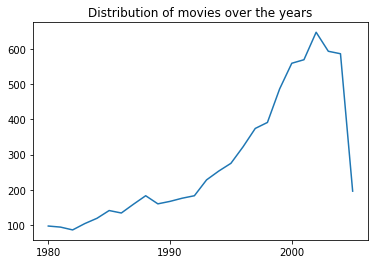

In [6]:
plot(df)

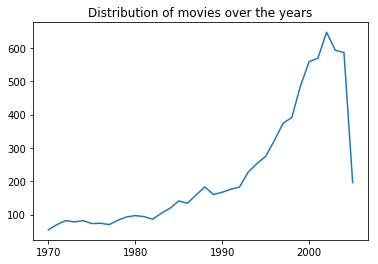

In [7]:
plot(df, start=1970)

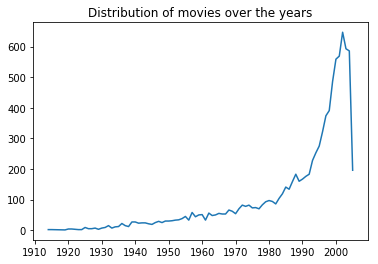

In [8]:
plot(df, start=1910)

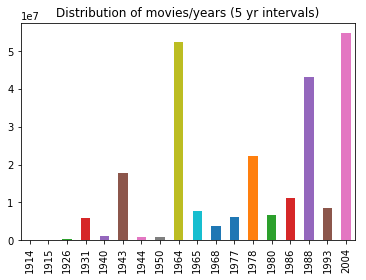

In [64]:
plot(df2, kind='bar', start=1910, prefix='r')

In [104]:
res = pd.read_pickle('80_20_min_max.pkl')

In [105]:
res

,type,MAE_3,MAE_4,MAE_5
0,mean,0.446,0.443,0.505
1,max,0.744,0.790,0.998
2,min,0.670,0.681,0.842


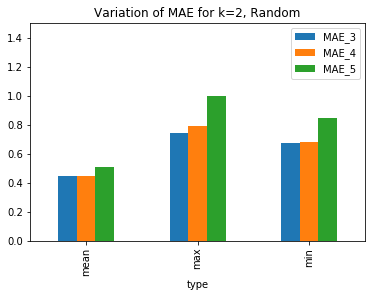

In [106]:
plot(res, kind='bar')